In [48]:
import os, sys
sys.path.append("..")

In [49]:
from opttrot.pauli import from_pstr
from opttrot.pauli_frame import PauliFrame
from opttrot.hamiltonian import Hamiltonian
from opttrot.utils import _bitwise_count_c

from opttrot.graph_algs.graph_opts import DWave

In [50]:
import numpy as np
np.version.version
from matplotlib import pyplot as plt

# Test with IZ family Hamiltonian

In [51]:
# Random IZ Hamiltonian
qubits = 4
N = int(2**qubits)
H = np.diag(np.random.rand(N)).astype(complex)
H[1,2] = 0.4
H[2,1] = 0.4

In [52]:
hamiltonian = Hamiltonian(H)

In [53]:
a = hamiltonian.poly

In [54]:
a

array([PauliElement(n=4, weight=0.298797+(0.000000)j, IIII),
       PauliElement(n=4, weight=0.609617+(0.000000)j, IIIZ),
       PauliElement(n=4, weight=0.400000+(0.000000)j, IIXY),
       PauliElement(n=4, weight=0.400000+(0.000000)j, IIYX),
       PauliElement(n=4, weight=0.828176+(0.000000)j, IIZI),
       PauliElement(n=4, weight=0.413213+(0.000000)j, IIZZ),
       PauliElement(n=4, weight=0.430828+(0.000000)j, IZII),
       PauliElement(n=4, weight=0.629376+(0.000000)j, IZIZ),
       PauliElement(n=4, weight=0.081672+(0.000000)j, IZZI),
       PauliElement(n=4, weight=0.953024+(0.000000)j, IZZZ),
       PauliElement(n=4, weight=0.431975+(0.000000)j, ZIII),
       PauliElement(n=4, weight=0.672352+(0.000000)j, ZIIZ),
       PauliElement(n=4, weight=0.519359+(0.000000)j, ZIZI),
       PauliElement(n=4, weight=0.139451+(0.000000)j, ZIZZ),
       PauliElement(n=4, weight=0.566864+(0.000000)j, ZZII),
       PauliElement(n=4, weight=0.621489+(0.000000)j, ZZIZ),
       PauliElement(n=4,

In [74]:
st = [s for p, s in hamiltonian.terms]
st

['IIII',
 'IIIZ',
 'IIXY',
 'IIYX',
 'IIZI',
 'IIZZ',
 'IZII',
 'IZIZ',
 'IZZI',
 'IZZZ',
 'ZIII',
 'ZIIZ',
 'ZIZI',
 'ZIZZ',
 'ZZII',
 'ZZIZ',
 'ZZZI',
 'ZZZZ']

In [55]:
mat = hamiltonian.adj_mat

In [56]:
from dwave.cloud import Client
from dwave.system.samplers import DWaveCliqueSampler
import dwave_networkx as dnx

import rustworkx as rx
import networkx as nx

token = r"yXwP-57ffecb35c6d604ff99be7b49223982f60ea4b42"

In [57]:
client = Client(token= token)

In [58]:
sampler_cli = DWaveCliqueSampler(token= token)

In [59]:
g = hamiltonian.to_graph(networkx=True)

In [60]:
len(g)

18

In [61]:
dnx.maximum_clique(g,  sampler = sampler_cli)

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [31]:
len([0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

16

In [62]:
L = hamiltonian.get_commuting_group(solver = None)

In [63]:
len(L[0])

10

In [64]:
adj = rx.adjacency_matrix(hamiltonian.to_graph())
G = nx.from_numpy_array(adj)

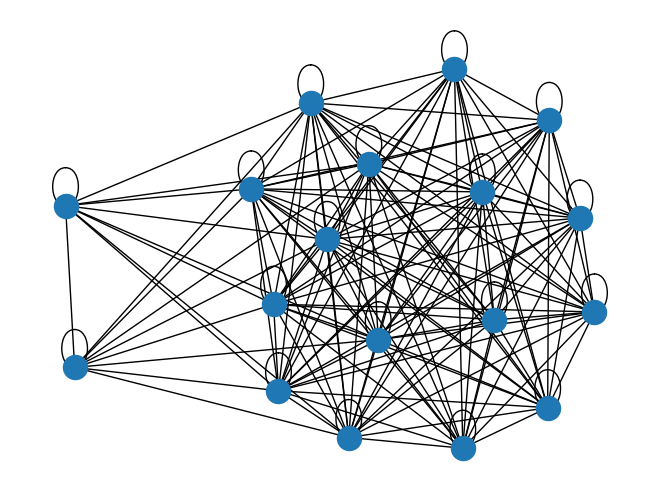

In [65]:
nx.draw(G)

In [66]:
sampler_cli = DWaveCliqueSampler(token= token)
clique = dnx.maximum_clique(G, sampler = sampler_cli)

In [67]:
dwave_solver = DWave(token=token)

In [68]:
hamiltonian.get_commuting_group(solver = dwave_solver)

Get a client:
Initiate the solver:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[2, 3]


[[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [2, 3]]

In [70]:
commuting_group = hamiltonian.get_commuting_group()

In [75]:
[st.index(c) for c in commuting_group[0]], [st.index(c) for c in commuting_group[1]]

([2, 3, 0, 5, 6, 9, 10, 13, 14, 17], [1, 4, 7, 8, 11, 12, 15, 16])

In [11]:
pf = PauliFrame(qubits)
pf

1, IIIZ, IIIX
1, IIZI, IIXI
1, IZII, IXII
1, ZIII, XIII

In [22]:
Distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
pf = PauliFrame(qubits)
for p in commuting_group[0]:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    Distance[L].append(p)

print(Distance)


{0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'], 1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'], 2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'], 3: ['ZZZZ']}


In [15]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

In [16]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

Modified Ultra Greedy Search

```
Algorithm 1 PFG Ultra-greedy Search 

Input: List of Hamiltonian terms and angles H = {(θα, pα)} 
Return: List of circuit elements Creturn 
1: Creturn ← {} i.e. is an empty circuit. 
2: ham ← {bin(pα)}. 
3: while ham ̸= ∅ do 
4:      minsup ← N 
5:      hammin = {} 
6:      cost = 1.1 
7:      gmin ← I 
8:      for p ∈ ham do 
9:         if Supp(p) =1 then 
10:            Add rotation to Creturn according to local support for 
               angle ±θα with sign given by sign of p. 
11:            Remove p from ham. 
12:        else if Supp(p) = minsup then 
13:            Add p to hammin 
14:        else if 2 ≤ Supp(p) < minsup then 
15:            Clear hammin and add p 
16:            minsup ← Supp(p) 
17:        end if 
18:     end for 
19:     for p ∈ hammin do 
20:         for all gates g which reduces support of p do 
21:             if costc(g) < cost then 
22:                 gmin ← g. 
23:                 cost ← costc(g) 
24:             end if 
25:         end for 
26:     end for 
27:     Add gmin to Creturn. 
28:     Update all members of ham using the TQE transformation rules for gmin. 
29: end while
```